In [1]:
import arviz as az
import numpy as np

In [2]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
# True parameter values
a, b, c, d, e, f = 0.7, 0.3, 0.4, 0.6, 0.1, 0.9
a1 = [a,b]
a2 = [c,d]
a3 = [e,f]

k1 = 0.5 * a + 0.5 * c
k2 = 0.5 * b + 0.5 * d
k3 = 0.5 * c + 0.5 * e
k4 = 0.5 * d + 0.5 * f

e1 = [k1, k2]
e2 = [k3, k4]

In [4]:
print(e1)
print(e2)

[0.55, 0.44999999999999996]
[0.25, 0.75]


In [5]:
import pymc as pm
print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.15.1


In [6]:
basic_model = pm.Model()

basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha1 = pm.Uniform("alpha1", lower=[1,1], upper=[10,10])
    alpha2 = pm.Uniform("alpha2", lower=[1,1], upper=[10,10])
    alpha3 = pm.Uniform("alpha3", lower=[1,1], upper=[10,10])
    a1 = pm.Dirichlet("a1", a=alpha1)
    a2 = pm.Dirichlet("a2", a=alpha2)
    a3 = pm.Dirichlet("a3", a=alpha3)
    sigma = 0.01

    # Expected value of outcome
    mu_e1_1 = 0.5 * a1[0] + 0.5 * a2[0]
    mu_e1_2 = 0.5 * a1[1] + 0.5 * a2[1]
    mu_e2_1 = 0.5 * a2[0] + 0.5 * a3[0]
    mu_e2_2 = 0.5 * a2[1] + 0.5 * a3[1]
      
    # Likelihood (sampling distribution) of observations
    e1_obs_1 = pm.Normal("e1_obs_1", mu=mu_e1_1, sigma=sigma, observed=k1)
    e1_obs_2 = pm.Normal("e1_obs_2", mu=mu_e1_2, sigma=sigma, observed=k2)
    e2_obs_1 = pm.Normal("e2_obs_1", mu=mu_e2_1, sigma=sigma, observed=k3)
    e2_obs_2 = pm.Normal("e2_obs_2", mu=mu_e2_2, sigma=sigma, observed=k4)


In [7]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha1, alpha2, alpha3, a1, a2, a3]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.


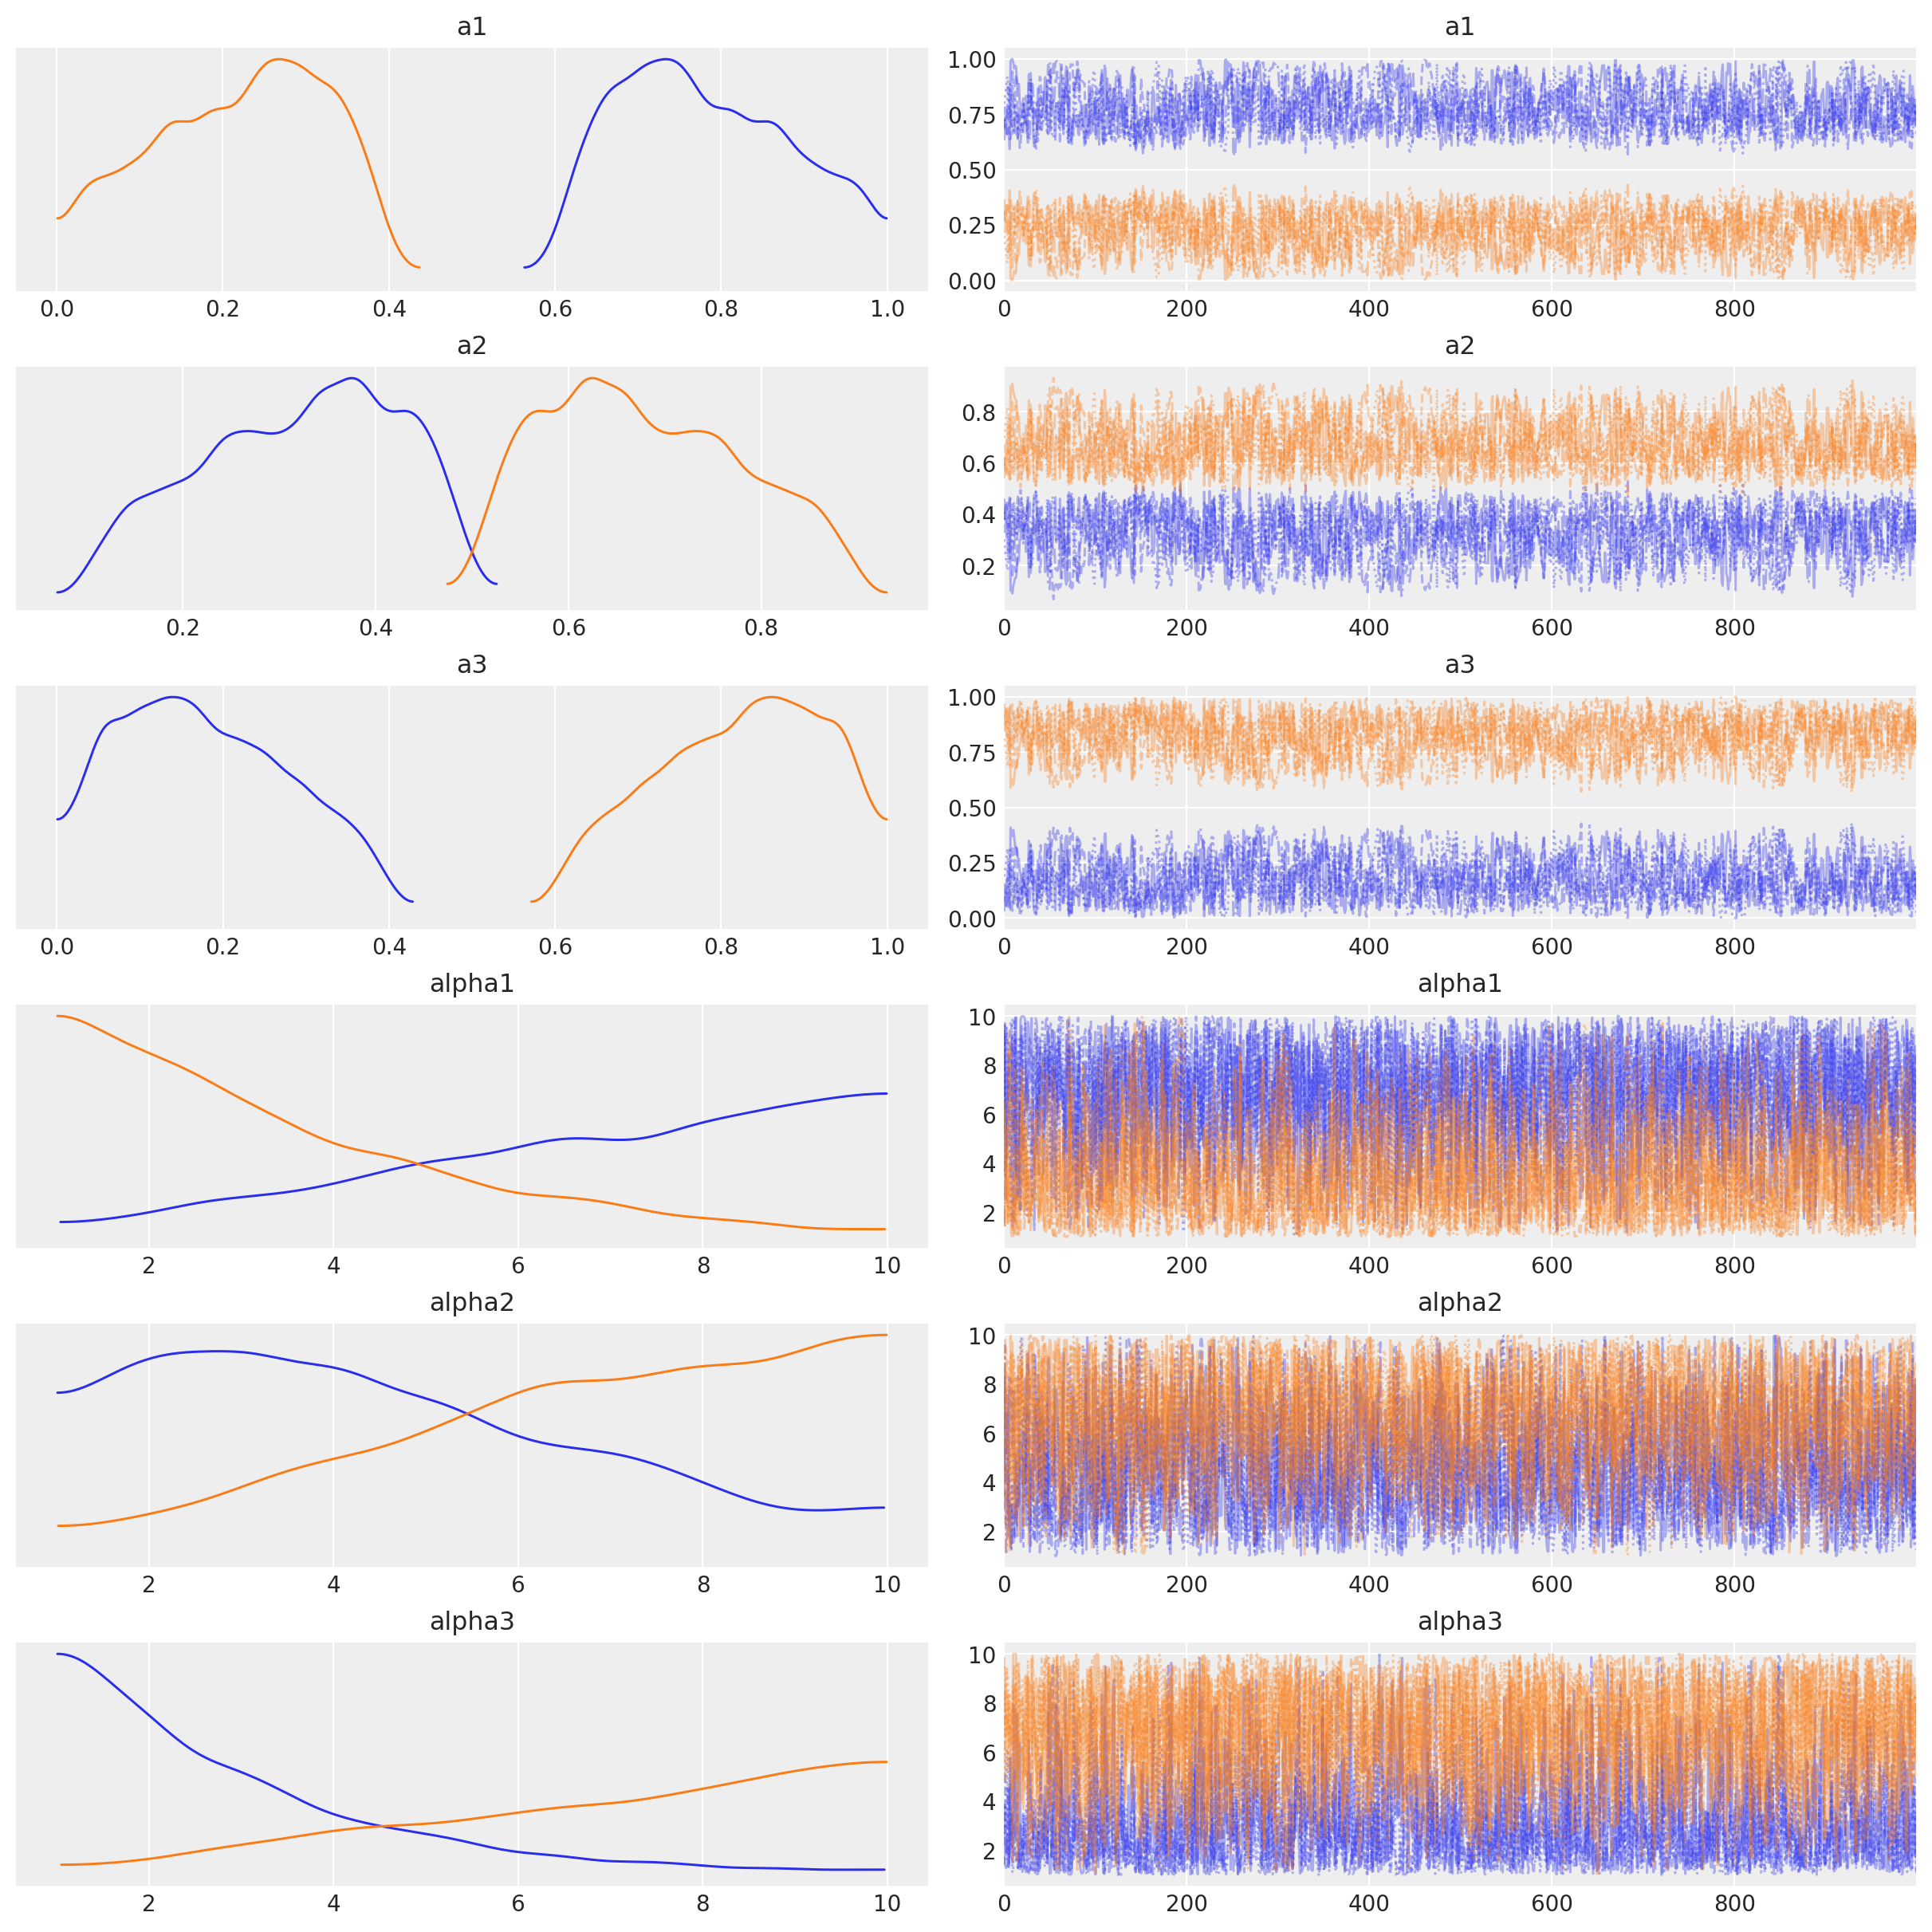

In [8]:
az.plot_trace(idata, combined=True);

In [9]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [10]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a1[0],0.78,0.10,0.62,0.97,0.00,0.00,833.78,1126.23,1.01
a1[1],0.22,0.10,0.03,0.38,0.00,0.00,833.78,1126.23,1.01
a2[0],0.32,0.10,0.14,0.48,0.00,0.00,825.97,1071.14,1.01
a2[1],0.68,0.10,0.52,0.86,0.00,0.00,825.97,1071.14,1.01
a3[0],0.18,0.10,0.01,0.36,0.00,0.00,835.27,1174.92,1.01
a3[1],0.82,0.10,0.64,0.99,0.00,0.00,835.27,1174.92,1.01
alpha1[0],6.82,2.23,2.78,10.00,0.04,0.03,2890.29,2180.56,1.00
alpha1[1],3.40,1.97,1.00,7.14,0.05,0.03,1375.63,1840.69,1.01
alpha2[0],4.44,2.25,1.00,8.40,0.05,0.04,1724.58,2203.83,1.00
alpha2[1],6.71,2.23,2.82,9.99,0.04,0.03,2720.42,1877.87,1.00
